In [ ]:
import cv2

# Open video device
capture1 = cv2.VideoCapture(0)
while True:
    ret, img = capture1.read() # Read an image
    cv2.imshow("ImageWindow", img) # Display the image
    if (cv2.waitKey(2) >= 0): # If the user presses a key, exit while loop
        break
cv2.destroyAllWindows() # Close window
cv2.VideoCapture(0).release() # Release video device

In [ ]:
#!/usr/bin/python

import sys
import cv2
import numpy
import os
import numpy

##
# Opens a video capture device with a resolution of 800x600
# at 30 FPS.
##
def open_camera(cam_id=0):
    cap = cv2.VideoCapture(cam_id)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)  # Fixed the property name
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1080)   # Fixed the property name
    cap.set(cv2.CAP_PROP_FPS, 30)            # Fixed the property name
    if not cap.isOpened():
        print("Error: Unable to open the camera.")
        sys.exit(1)
    return cap

##
# Gets a frame from an open video device, or returns None
# if the capture could not be made.
##
def get_frame(device):
    ret, img = device.read()
    if not ret:  # failed to capture
        sys.stderr.write("Error capturing from video device.\n")
        return None
    return img

##
# Closes all OpenCV windows and releases video capture device
# before exit.
##
def cleanup(device):
    device.release()
    cv2.destroyAllWindows()

########### Main Program ###########

if __name__ == "__main__":
    # Camera ID to read video from (numbered from 0)
    camera_id = 0
    dev = open_camera(camera_id)  # Open the camera as a video capture device
    captured_image = None  # To store the last frame

    try:
        while True:
            img_orig = get_frame(dev)  # Get a frame from the camera
            if img_orig is not None:  # If we did get an image
                cv2.imshow("video", img_orig)  # Display the image in a window named "video"
                captured_image = img_orig  # Save the frame
            else:  # If we failed to capture (camera disconnected?), then quit
                break

            if cv2.waitKey(2) >= 0:  # If the user presses any key, exit the loop
                break
    finally:
        # Always cleanup resources, even if an error occurs
        cleanup(dev)

    # Save the last captured image to a file if available
    if captured_image is not None:
        output_path = "/Users/h.chanid/Documents/DTU/Robotics/Output_camera/a7_with_line.jpg"
        cv2.imwrite(output_path, captured_image)
        print(f"Image saved as {output_path}")
    else:
        print("No image captured.")

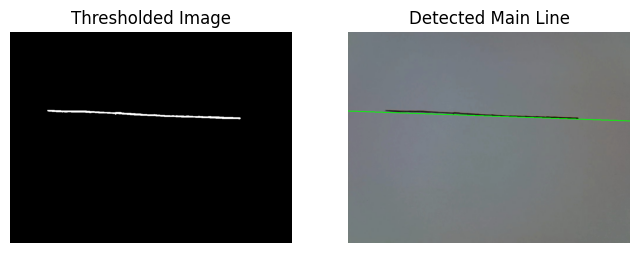

Main Line: rho = 272.00, theta = 1.61 radians


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def detect_main_line(image_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}. Please check the file path.")
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Adjusted thresholding to isolate the black line
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
    
    # Detect edges using Canny edge detection
    edges = cv2.Canny(thresh, 30, 150, apertureSize=3)
    
    # Perform Hough Line Transform to detect the line
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 50)  # Lower threshold for Hough Transform

    # Filter lines to find the main one
    if lines is not None:
        # Group lines with similar rho and theta values
        rho_values = [line[0][0] for line in lines]
        theta_values = [line[0][1] for line in lines]

        # Compute the median rho and theta
        median_rho = np.median(rho_values)
        median_theta = np.median(theta_values)

        # Find the line closest to the median values
        best_line = min(lines, key=lambda line: abs(line[0][0] - median_rho) + abs(line[0][1] - median_theta))
        rho, theta = best_line[0]
        
        # Draw the selected line on the original image
        output_img = img.copy()
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        cv2.line(output_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    else:
        output_img = img.copy()
        rho, theta = None, None

    # Display the thresholded image
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Image")
    plt.axis("off")
    
    # Display the output image with the detected main line
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Main Line")
    plt.axis("off")
    plt.show()

    # Return the detected line's rho and theta
    return rho, theta

# Main Function
if __name__ == "__main__":
    # Path to your image
    image_path = "/Users/h.chanid/Documents/DTU/Robotics/Output_camera/a7_with_line.jpg"  # Replace with your actual image path

    # Detect the main line in the image
    rho, theta = detect_main_line(image_path)

    # Print the detected line
    if rho is not None and theta is not None:
        print(f"Main Line: rho = {rho:.2f}, theta = {theta:.2f} radians")
    else:
        print("No main line detected.")


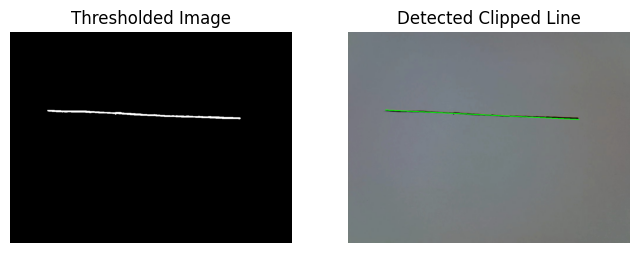

Clipped Line Endpoints: [(127, 268), (786, 300)]


In [5]:
def detect_main_line(image_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}. Please check the file path.")
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Adjusted thresholding to isolate the black line
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
    
    # Detect edges using Canny edge detection
    edges = cv2.Canny(thresh, 30, 150, apertureSize=3)
    
    # Perform Hough Line Transform to detect the line
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 50)

    # Extract the contour of the black line
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Find the largest contour (assuming it corresponds to the line)
        line_contour = max(contours, key=cv2.contourArea)
        
        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(line_contour)
        line_endpoints = [(x, y), (x + w, y + h)]
    else:
        line_endpoints = None

    # Initialize output image
    output_img = img.copy()

    # Draw the detected line based on the Hough Transform
    if lines is not None and line_endpoints:
        for line in lines:
            rho, theta = line[0]  # Correct unpacking
            # Convert polar coordinates to Cartesian coordinates
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))  # Infinite line endpoint 1
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 - 1000 * (-b))  # Infinite line endpoint 2
            y2 = int(y0 - 1000 * a)

            # Use the contour endpoints to clip the detected line
            cv2.line(output_img, line_endpoints[0], line_endpoints[1], (0, 255, 0), 2)
    else:
        print("No line detected.")

    # Display the thresholded image
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Image")
    plt.axis("off")
    
    # Display the output image with the detected main line
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Clipped Line")
    plt.axis("off")
    plt.show()

    # Return the clipped line endpoints
    return line_endpoints

# Main Function
if __name__ == "__main__":
    # Path to your image
    image_path = "/Users/h.chanid/Documents/DTU/Robotics/Output_camera/a7_with_line.jpg"  # Replace with your actual image path

    # Detect the main clipped line in the image
    endpoints = detect_main_line(image_path)

    # Print the clipped line endpoints
    if endpoints:
        print(f"Clipped Line Endpoints: {endpoints}")
    else:
        print("No clipped line detected.")

In [7]:
import numpy as np
import cv2

# Camera parameters (replace with your actual values)
camera_matrix = np.array([[1068.0, 0, 506.8],
                          [0, 1083.0, 371.8],
                          [0, 0, 1]])  # Intrinsic parameters

dist_coeffs = np.array([0.1158, 0.0412, 0, 0, 0])  # Distortion coefficients

# Rotation and translation vectors (extrinsic parameters)
rotation_vector = np.array([[0.1335], [0.0274], [0.0131]])  # Replace with actual values
translation_vector = np.array([[-3.2742], [-3.3057], [18.4347]])  # Replace with actual values

# Line endpoints in image coordinates (from the detection step)
image_points = np.array([[127, 268], [786, 300]], dtype=np.float32)  # Replace with actual endpoints

# Assume the line lies on the Z = 0 plane in the real world
object_points = cv2.undistortPoints(image_points, camera_matrix, dist_coeffs)
object_points = np.hstack((object_points.squeeze(), np.zeros((2, 1))))  # Add Z = 0

# Transform points to world coordinates
rotation_matrix, _ = cv2.Rodrigues(rotation_vector)  # Convert rotation vector to matrix
world_points = (rotation_matrix @ object_points.T).T + translation_vector.T

# Print the transformed points
for i, point in enumerate(world_points):
    print(f"Real-world coordinates of endpoint {i + 1}: {point}")


Real-world coordinates of endpoint 1: [-3.62302046 -3.40440487 18.43138335]
Real-world coordinates of endpoint 2: [-3.01435912 -3.36698994 18.41908526]
